Key Features of Plotnine
Layered Approach: Build plots incrementally by adding layers (points, lines, labels, etc.).

Data-Driven Aesthetics: Map DataFrame columns directly to visual properties such as axes, colors, or size.

Seamless Integration with Pandas: Designed to work directly with pandas DataFrames, making it easy to visualize real-world datasets.

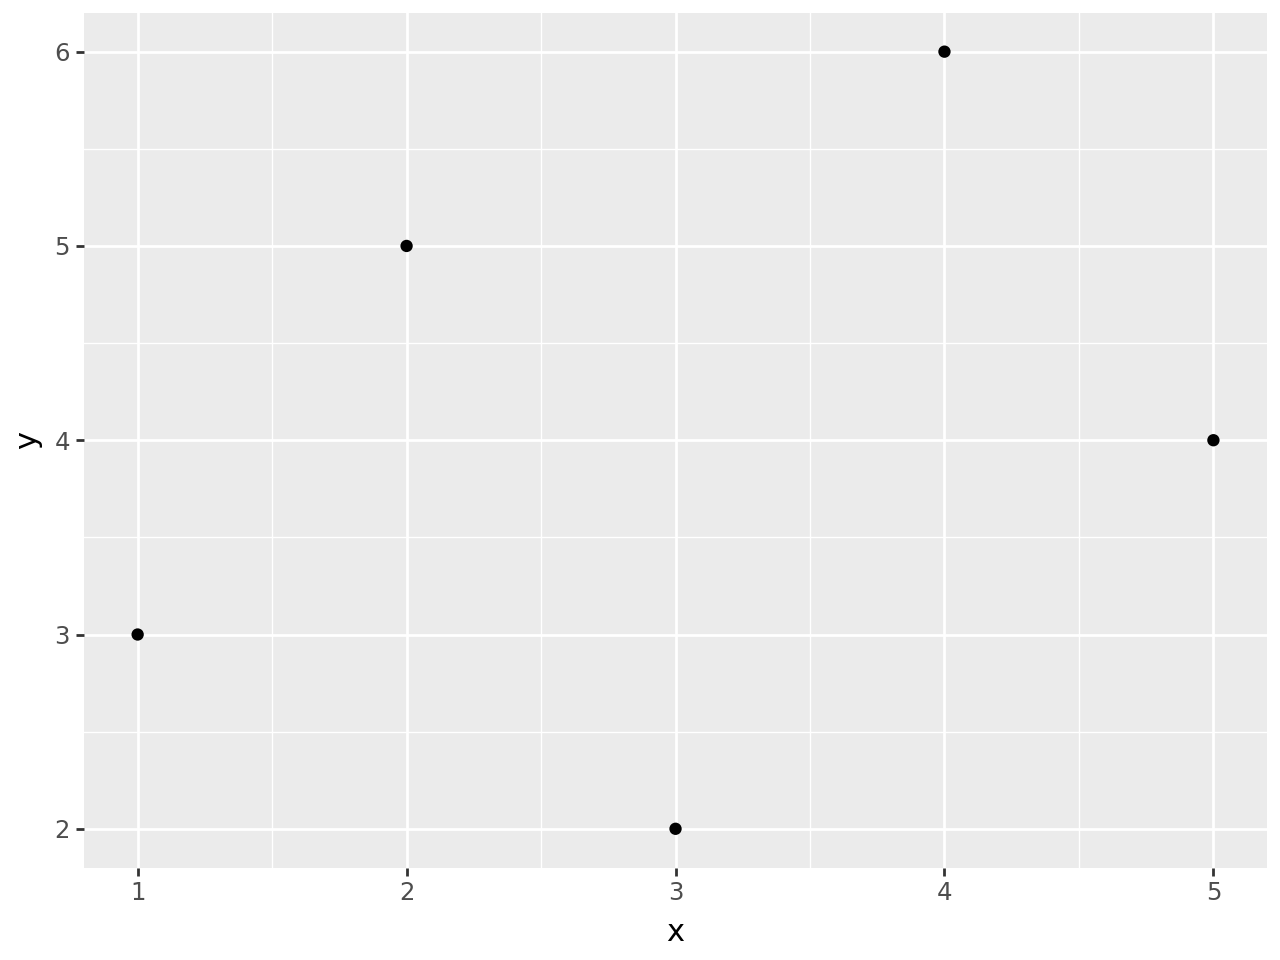

In [1]:
from plotnine import ggplot, aes, geom_point
import pandas as pd

# Sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [3, 5, 2, 6, 4]})

# Creating a scatter plot
(ggplot(data, aes(x='x', y='y')) + geom_point())
#aes(x='x', y='y', color='category')


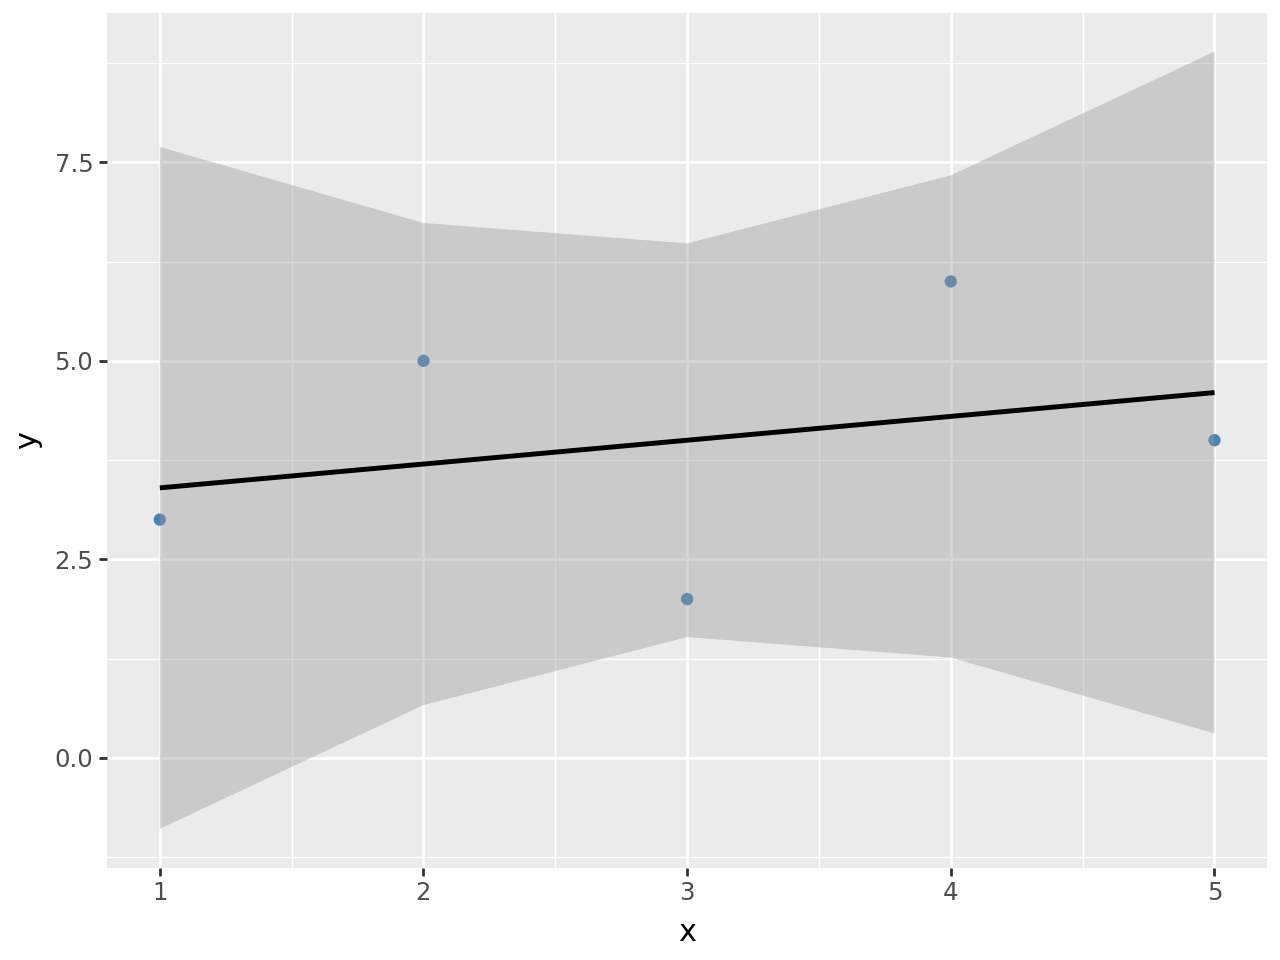

In [ ]:
from plotnine import geom_smooth
# (ggplot(data, aes(x='x', y='y')) + geom_point(color='steelblue') + geom_smooth(method='lm'))

(ggplot(data, aes(x='x', y='y')) +
 geom_point(color='steelblue') +
 geom_smooth(method='lm')
 )



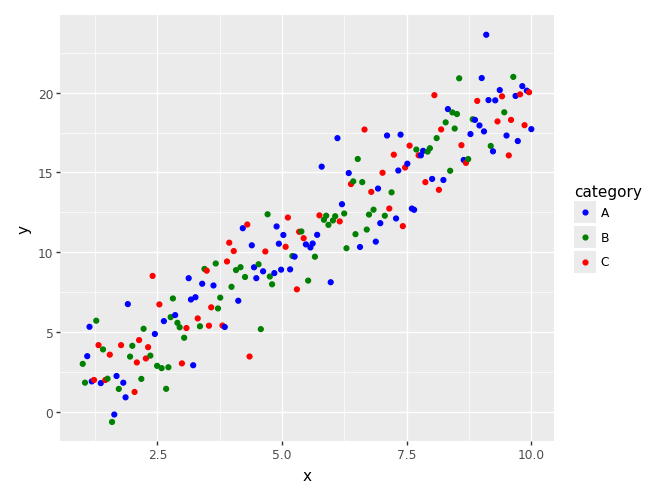

In [3]:
import pandas as pd
import numpy as np

from plotnine import ggplot, aes, geom_point, scale_color_manual
# Set random seed for reproducibility
np.random.seed(42)# Generate example data

x = np.linspace(1, 10, 200)
y = 2 * x + np.random.normal(0, 2, 200)

category = np.random.choice(['A', 'B', 'C'], size=200)

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y, 'category': category})

# Plot with customized colors
plot = (ggplot(data, aes(x='x', y='y', color='category')) +
        geom_point() +
        scale_color_manual(values=["blue", "green", "red"]))

# Display the plot
plot.draw()


Theme: theme_gray()
Description: Default theme with gray background and white gridlines (like ggplot2)

Theme: theme_bw()
Description: Black-and-white theme with minimal background (clean & professional)

Theme: theme_classic()
Description: No gridlines, minimal axis lines — good for publications

Theme: theme_minimal()
Description: Very light theme with no panel borders or gridlines

Theme: theme_light()
Description: Light grid and background, slightly more subtle than theme_gray()

Theme: theme_dark()
Description: Dark background and white text/gridlines (useful for dark mode)

Theme: theme_void()
Description: Completely empty canvas — great for custom annotations or maps

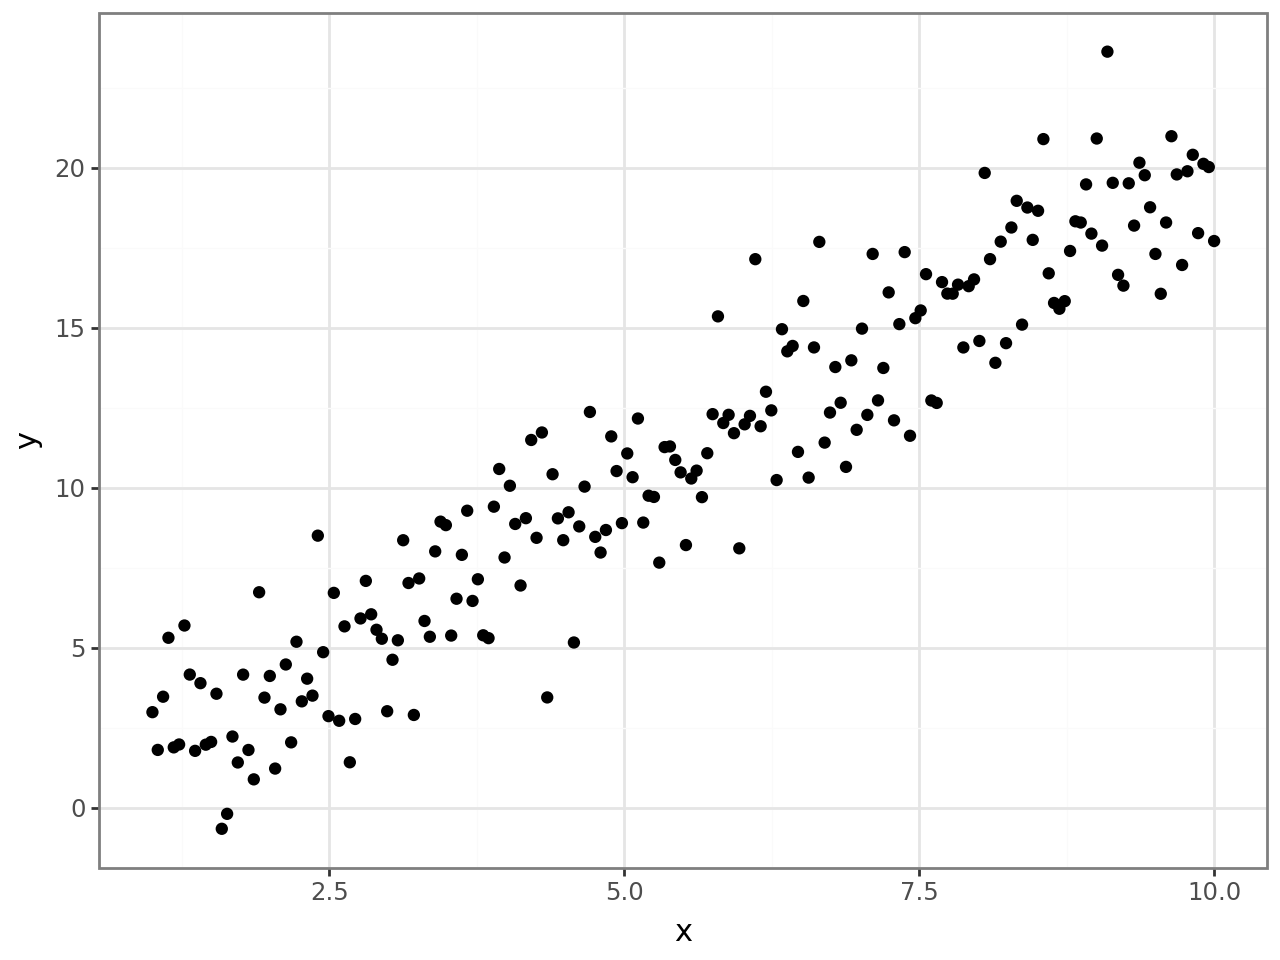

In [ ]:
from plotnine import theme_bw

(ggplot(data, aes(x='x', y='y')) +
 geom_point() +
 theme_bw())


In [ ]:

# from google.colab import files
# import pandas as pd

# from plotnine import (
#     ggplot, aes, geom_point, geom_smooth, geom_histogram, geom_density,
#     geom_col, geom_line, labs, theme_bw, theme, element_text, scale_x_discrete, ggsave
# )
# import os

# # Step 2: Prompt the user to upload a file
# uploaded = files.upload()


In [ ]:
df = pd.read_csv(".\data\Cleaned_Students_Performance.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


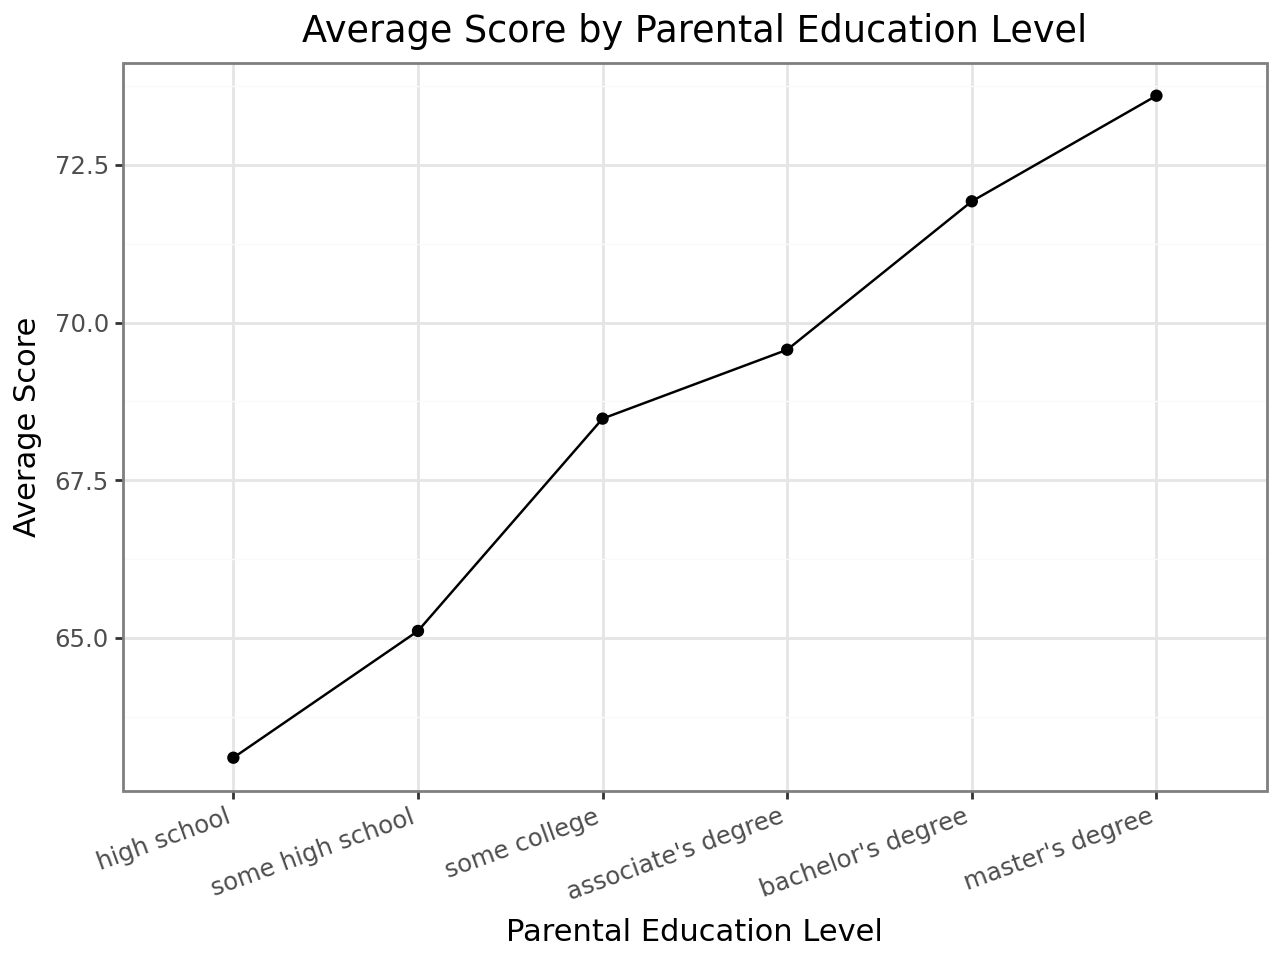

In [27]:
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, geom_histogram, geom_density, geom_col, geom_line, labs, theme_bw, theme, element_text, scale_x_discrete, ggsave
)

# Creating a Dataframe of Mean Average Score, grouped by Parental_level_of_Education
mean_pe = (df.groupby("parental_level_of_education", dropna=False)).agg(avg=("average_score", "mean")).reset_index()

# Order the Values by Avg Score (Asc)
order = mean_pe.sort_values("avg")['parental_level_of_education'].to_list()

# Create Plot
(
    ggplot(mean_pe, aes(x='parental_level_of_education', y='avg', group=1))
    +geom_line()
    +geom_point()
    +labs(
        title='Average Score by Parental Education Level',
        x = 'Parental Education Level',
        y = 'Average Score')
    +theme_bw()
    +theme(axis_text_x=element_text(rotation=20, ha='right'))
    +scale_x_discrete(limits=order)
)

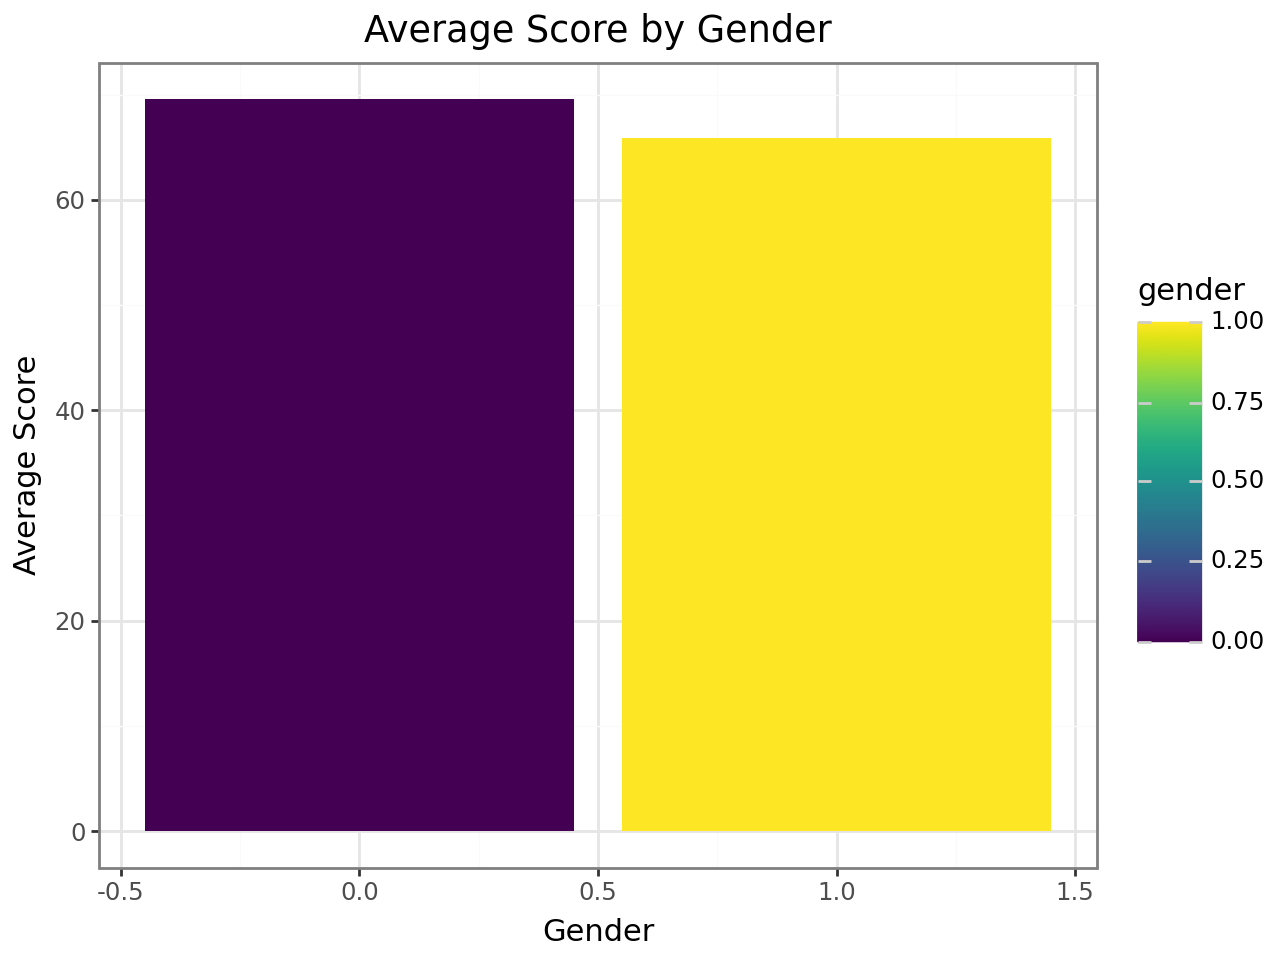

In [32]:
# Lesson Challenge
mean_gender = (df.groupby('gender', dropna=False)).agg(avg=("average_score", "mean")).reset_index()

# Create Plot
(
    ggplot(mean_gender, aes(x='gender', y='avg', fill='gender'))
    +geom_col()
    +labs(
        title='Average Score by Gender',
        x = 'Gender',
        y = 'Average Score')
    +theme_bw()
)

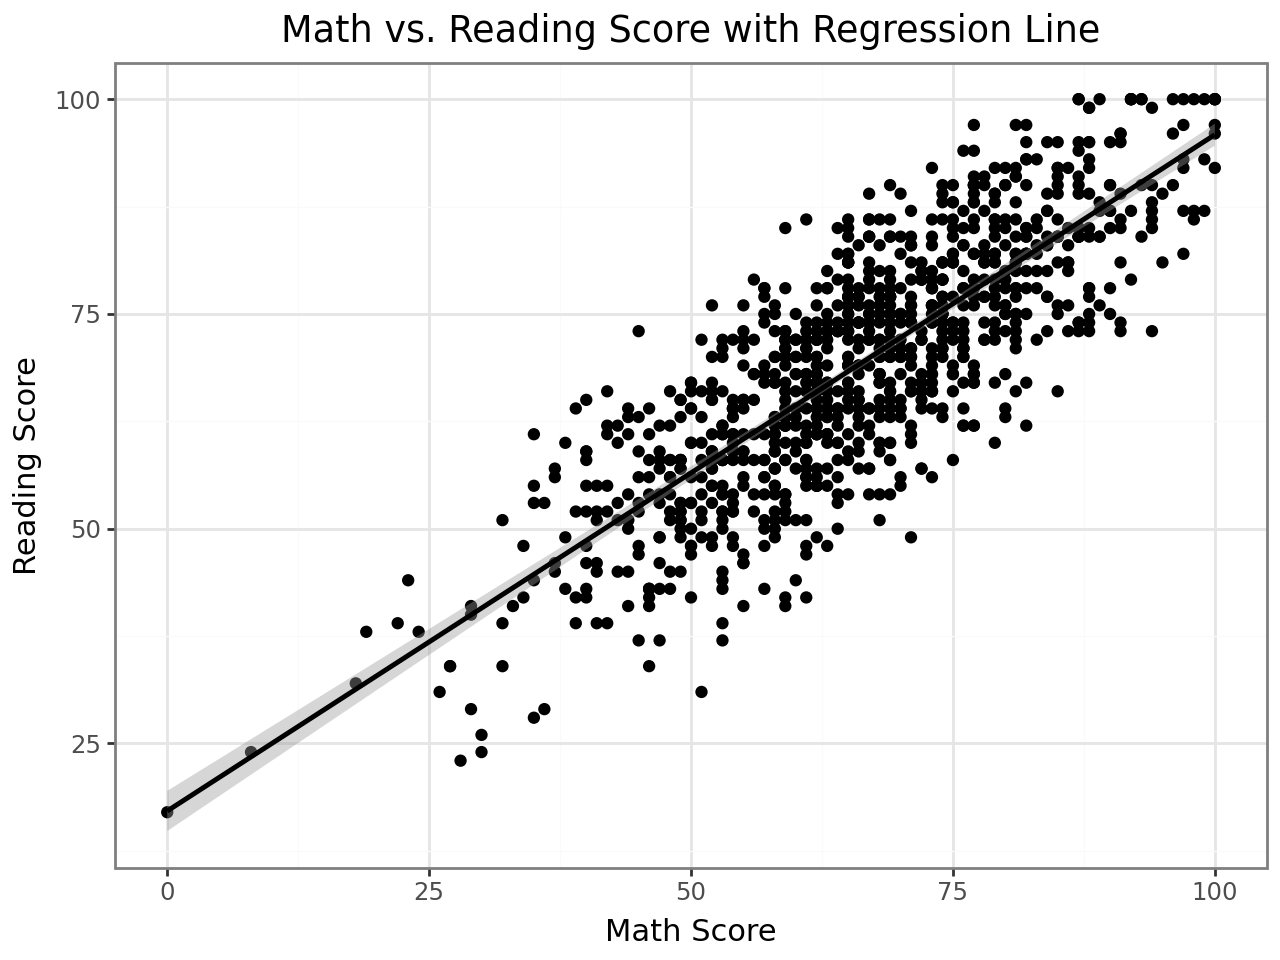

In [34]:
(ggplot(df, aes(x='math_score', y='reading_score'))
 +geom_point()
 +theme_bw()
 +labs(
    title='Math vs. Reading Score with Regression Line',
    x = 'Math Score',
    y = 'Reading Score')
 +geom_smooth(method='lm')
)

🔹 A. Scatter & Line Charts

Scatter plot: geom_point()

Line chart: geom_line()

Smooth line / regression: geom_smooth() (e.g., method='lm')

🔹 B. Distribution Charts

Histogram: geom_histogram()

Density plot: geom_density()

Box plot: geom_boxplot()

Violin plot: geom_violin()

Dot plot: geom_dotplot()

🔹 C. Bar Charts

Bar plot (automatic count): geom_bar() (requires only x)

Bar plot (manual height): geom_col() (requires both x and y)

🔹 D. Categorical / Comparison Plots

Jittered scatter plot: geom_jitter()

Count plot: geom_count()

Heatmap / tile plot: geom_tile()

🔹 E. Specialized Visualizations

Area chart: geom_area()

Ribbon / confidence interval: geom_ribbon()

Step plot: geom_step()

Segments / arrows: geom_segment()

Text / labels: geom_text() or geom_label()

🔹 F. Faceting and Layout

facet_wrap(): Creates small multiples based on a single variable

facet_grid(): Creates a grid of plots using two categorical variables



In [36]:
# Import Plotly Express and pandas
import plotly.express as px
import pandas as pd

# Create a simple DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 11, 12, 13]})


In [43]:
# Create an interactive line chart
fig = px.line(data, x='x', y='y', markers='o')  # 'x' and 'y' specify columns to plot
fig.show()  # Display the figure


In [40]:
# Create an interactive scatter plot
fig = px.scatter(data, x='x', y='y', color='y')  # color differentiates data points
fig.show()


In [44]:

fig.update_layout(
    title='Customized Plot',        # Adds a plot title
    xaxis_title='X Axis',           # Label for X axis
    yaxis_title='Y Axis',           # Label for Y axis
    template='plotly_dark'          # Applies a dark visual theme
)
fig.show()


In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a 1-row, 2-column subplot layout
fig = make_subplots(rows=1, cols=2)

# Add scatter plot to first subplot
fig.add_trace(go.Scatter(x=data['x'], y=data['y']), row=1, col=1)

# Add bar chart to second subplot
fig.add_trace(go.Bar(x=data['x'], y=data['y']), row=1, col=2)

fig.show()


In [46]:
# Adding a z-axis column
data = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 11, 12, 13]})
data['z'] = [5, 10, 15, 20]

# Create interactive 3D scatter plot
fig = px.scatter_3d(data, x='x', y='y', z='z', color='y')
fig.show()


In [47]:
import pandas as pd
import numpy as np
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 random x, y, z values
x = np.random.uniform(0, 100, 100)  # 100 values between 0 and 100
y = np.random.uniform(0, 100, 100)
z = np.random.uniform(0, 100, 100)

# Optionally create a color scale (e.g., based on y values)
color = y

# Create DataFrame
data = pd.DataFrame({'x': x, 'y': y, 'z': z, 'color': color})

# Create 3D scatter plot
fig = px.scatter_3d(
    data, x='x', y='y', z='z',
    color='color',                  # color by 'y' values (or any continuous/categorical variable)
    title='3D Scatter Plot of Random Data',
    labels={'x': 'X Axis', 'y': 'Y Axis', 'z': 'Z Axis'}
)

# Show interactive plot
fig.show()



In [ ]:

from google.colab import files
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import os


import os

# Step 2: Prompt the user to upload a file
uploaded = files.upload()


In [48]:
df = pd.read_csv(".\data\E-commerce_Customer_Behavior-Sheet1.csv")

print(df.head(30))
df.info()

    Customer ID  Gender  Age           City Membership Type  Total Spend  \
0           101  Female   29       New York            Gold      1120.20   
1           102    Male   34    Los Angeles          Silver       780.50   
2           103  Female   43        Chicago          Bronze       510.75   
3           104    Male   30  San Francisco            Gold      1480.30   
4           105    Male   27          Miami          Silver       720.40   
5           106  Female   37        Houston          Bronze       440.80   
6           107  Female   31       New York            Gold      1150.60   
7           108    Male   35    Los Angeles          Silver       800.90   
8           109  Female   41        Chicago          Bronze       495.25   
9           110    Male   28  San Francisco            Gold      1520.10   
10          111    Male   32          Miami          Silver       690.30   
11          112  Female   36        Houston          Bronze       470.50   
12          

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\nivya\AppData\Local\Temp\ipykernel_13216\4175103186.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [50]:
bar_chart = px.bar(df, x='Age', y='Total Spend', title='Total Spend by Age')
bar_chart.show()

In [54]:
age_bins = [0, 20, 30, 40, 50]
labels = ['0-20', '21-30', '31-40', '41-50']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels, right=False)

age_spend = (
    df.dropna(subset=['Age_Group', 'Total Spend']).groupby('Age_Group', observed=True)['Total Spend'].sum().reset_index()
)

fig_bar_age = px.bar(age_spend, x='Age_Group', y='Total Spend', title='Total Spend by Age Group')
fig_bar_age.show()

In [55]:
fig_pie_city = px.pie(
    df, names='Membership Type', facet_col='City', title='Membership Type Distribution by City', facet_col_wrap=3
)

fig_pie_city.show()

In [57]:
histgram = px.histogram(df, x='Days Since Last Purchase', title='Frequency of Days Since Last Purchase') #Bins=20
histgram.show()

In [58]:
boxplot = px.box(df, x='Average Rating', y='Satisfaction Level', title='Average Rating by Satisfaction Level', orientation='h')
boxplot.show()

In [64]:
fig_bubble_spend_satisfaction = px.scatter(
    df, 
    x='Average Rating', 
    y='Items Purchased', 
    size='Total Spend',
    size_max=40, 
    color='Satisfaction Level', 
    title='Spending Habits vs. Satisfaction Levels'
)

fig_bubble_spend_satisfaction.show()

In [67]:
rating_grp = df.dropna(subset=['Average Rating']).groupby(['Discount Applied', 'Satisfaction Level'], as_index=False)['Average Rating'].mean()

bar_discount_rating = px.bar(
    rating_grp, 
    x='Discount Applied', 
    y='Average Rating', 
    color='Satisfaction Level', 
    barmode='group', 
    title='Average Rating by Discount and Satisfaction Level'
)

bar_discount_rating.show()